<a href="https://colab.research.google.com/github/mdjabedmollah/ml-learning/blob/main/ID_222002167_CSE412_222D3_LabReport02_knnFromScratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best K Value: 1, Accuracy: 1.000

Custom KNN - Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1 Score: 1.000
Sklearn KNN - Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1 Score: 1.000


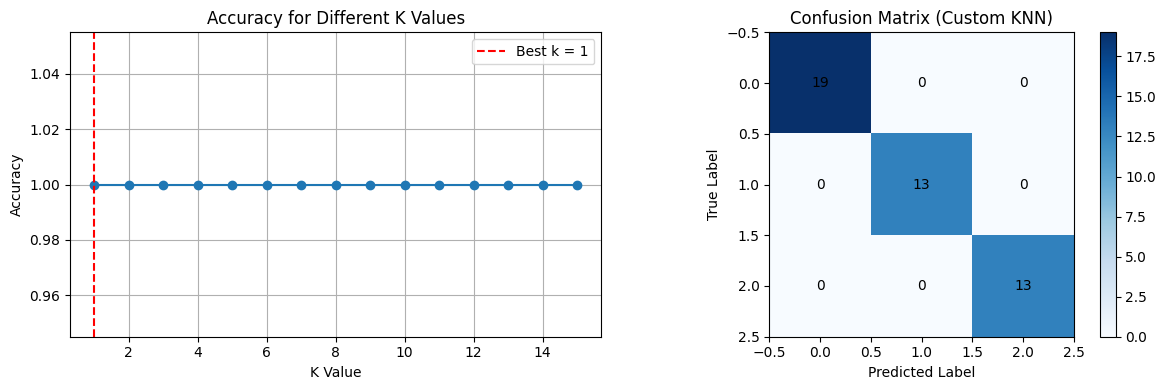


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [3]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

class MyKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, features, labels):
        self.train_data = features
        self.train_labels = labels

    def predict(self, test_data):
        predictions = []

        for test_point in test_data:

            distances = [np.sqrt(np.sum((test_point - train_point) ** 2)) for train_point in self.train_data]


            nearest_indices = np.argsort(distances)[:self.k]

            nearest_labels = [self.train_labels[i] for i in nearest_indices]


            most_common_label = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(most_common_label)

        return np.array(predictions)


def calculate_accuracy(true_labels, predicted_labels):
    return np.mean(true_labels == predicted_labels)

def create_confusion_matrix(true_labels, predicted_labels, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(true_labels, predicted_labels):
        matrix[true][pred] += 1
    return matrix

def get_metrics(true_labels, predicted_labels, num_classes):
    matrix = create_confusion_matrix(true_labels, predicted_labels, num_classes)

    precision = np.diag(matrix) / np.sum(matrix, axis=0)
    recall = np.diag(matrix) / np.sum(matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)

    return np.nanmean(precision), np.nanmean(recall), np.nanmean(f1_score)

data = load_iris()
features, labels = data.data, data.target

best_k = 1
highest_accuracy = 0
accuracy_list = []

k_options = range(1, 16)

for k in k_options:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

    model = MyKNN(k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    acc = calculate_accuracy(y_test, predictions)
    accuracy_list.append(acc)

    if acc > highest_accuracy:
        highest_accuracy = acc
        best_k = k

print(f"Best K Value: {best_k}, Accuracy: {highest_accuracy:.3f}")

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

my_knn = MyKNN(best_k)
my_knn.fit(X_train, y_train)
my_predictions = my_knn.predict(X_test)

sklearn_knn = KNeighborsClassifier(n_neighbors=best_k)
sklearn_knn.fit(X_train, y_train)
sklearn_predictions = sklearn_knn.predict(X_test)


my_acc = calculate_accuracy(y_test, my_predictions)
sklearn_acc = calculate_accuracy(y_test, sklearn_predictions)

my_precision, my_recall, my_f1 = get_metrics(y_test, my_predictions, 3)
sklearn_precision, sklearn_recall, sklearn_f1 = get_metrics(y_test, sklearn_predictions, 3)

print(f"\nCustom KNN - Accuracy: {my_acc:.3f}, Precision: {my_precision:.3f}, Recall: {my_recall:.3f}, F1 Score: {my_f1:.3f}")
print(f"Sklearn KNN - Accuracy: {sklearn_acc:.3f}, Precision: {sklearn_precision:.3f}, Recall: {sklearn_recall:.3f}, F1 Score: {sklearn_f1:.3f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_options, accuracy_list, marker='o')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different K Values')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
cm = create_confusion_matrix(y_test, my_predictions, 3)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix (Custom KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

print(f"\nConfusion Matrix:\n{cm}")
